# FDA HW3-2
## 選擇 [Online Shoppers Purchasing Intention Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)
## Define a reasonable problem: 做 classification， 預測 Revenue 是 True / False
- 這個 dataset 是由 google analytics 出來的，而 Revenue 是代表說有沒有產生收入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn import preprocessing
from matplotlib.pyplot import figure

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 資料分析與前處理
- analyze the data
- preprocess the data

In [2]:
df = pd.read_csv("./online_shoppers_intention.csv", encoding="utf-8")
print(df.shape)
df.head(5)

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


- 檢查有沒有 missing value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### 將類別資料做 LabelEncoder 的轉換

In [4]:
le_Month = preprocessing.LabelEncoder()
df['le_Month'] = le_Month.fit_transform(df['Month'])

le_Revenue = preprocessing.LabelEncoder()
df['le_Revenue'] = le_Revenue.fit_transform(df['Revenue'])
print(le_Revenue.classes_)

le_Weekend = preprocessing.LabelEncoder()
df['le_Weekend'] = le_Weekend.fit_transform(df['Weekend'])
print(le_Weekend.classes_)

le_VisitorTyped = preprocessing.LabelEncoder()
df['le_VisitorType'] = le_VisitorTyped.fit_transform(df['VisitorType'])
print(le_VisitorTyped.classes_)

[False  True]
[False  True]
['New_Visitor' 'Other' 'Returning_Visitor']


In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,le_Month,le_Revenue,le_Weekend,le_VisitorType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,2,0,0,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2,0,0,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,2,0,0,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2,0,0,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,2,0,1,2


#### 看各個 features 的相關性

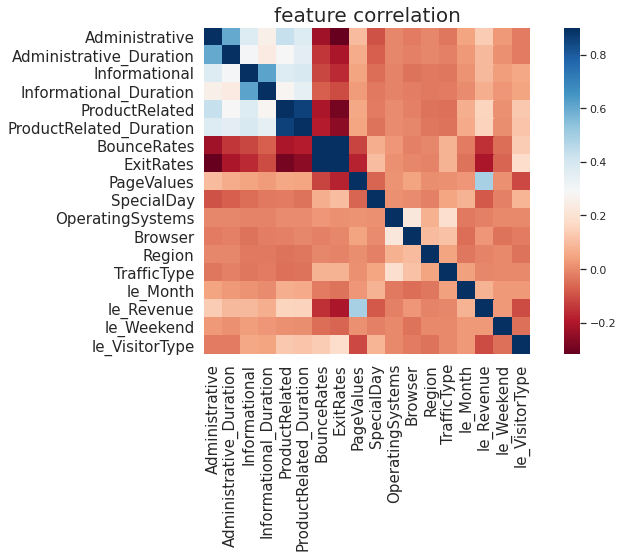

In [6]:
sns.set(context="paper", font="monospace")
sns.set(style="white")
f, ax = plt.subplots(figsize=(12,6))
train_corr = df.drop(['Month','VisitorType','Weekend','Revenue'],axis=1).corr()
sns.heatmap(train_corr, ax=ax, vmax=.9, square=True, cmap='RdBu')
ax.set_xticklabels(train_corr.index, size=15)
ax.set_yticklabels(train_corr.columns, size=15)
ax = ax.set_title('feature correlation', fontsize=20)

- 各個 feature 與 Revenue 的相關係數

In [7]:
train_corr['le_Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
le_Month                   0.080150
le_Revenue                 1.000000
le_Weekend                 0.029295
le_VisitorType            -0.104726
Name: le_Revenue, dtype: float64

#### Revenue 的分布，大約是 8.5:1.5，很不平均

False:  10422
True:  1908
0.8452554744525548


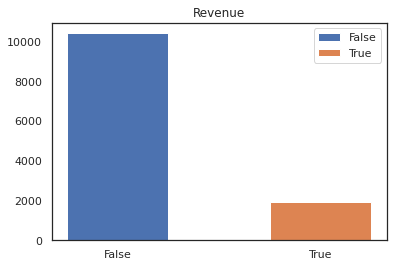

In [8]:
tmpR = [list(df.Revenue).count(False), list(df.Revenue).count(True)]
print('False: ', tmpR[0])
print('True: ', tmpR[1])
print(tmpR[0]/len(df))
plt.bar('False', tmpR[0], width=0.5)
plt.bar('True', tmpR[1], width=0.5)
plt.title('Revenue')
plt.legend(['False','True'])
plt.show()

- Weekend 的分布 (是不是周末)

False:  9462
True:  2868


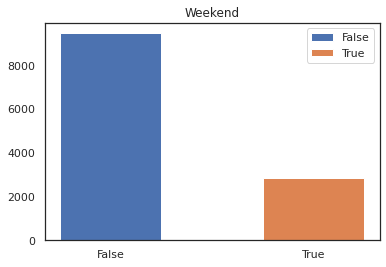

In [9]:
tmpR = [list(df.Weekend).count(False), list(df.Weekend).count(True)]
print('False: ', tmpR[0])
print('True: ', tmpR[1])
plt.bar('False', tmpR[0], width=0.5)
plt.bar('True', tmpR[1], width=0.5)
plt.title('Weekend')
plt.legend(['False','True'])
plt.show()

#### 觀察各個數值資料的分布情形


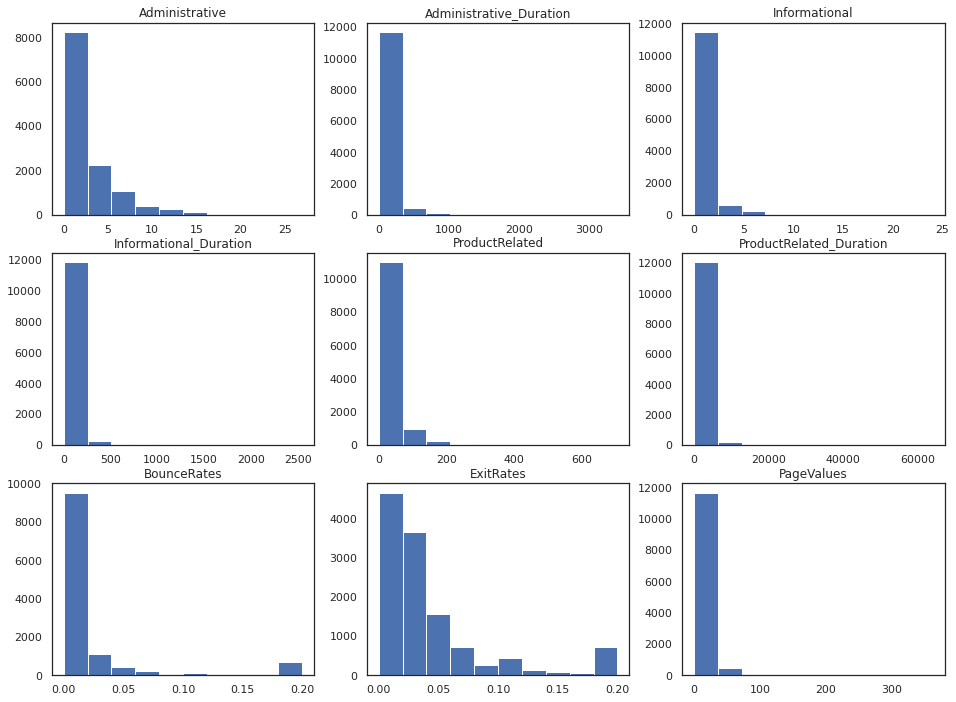

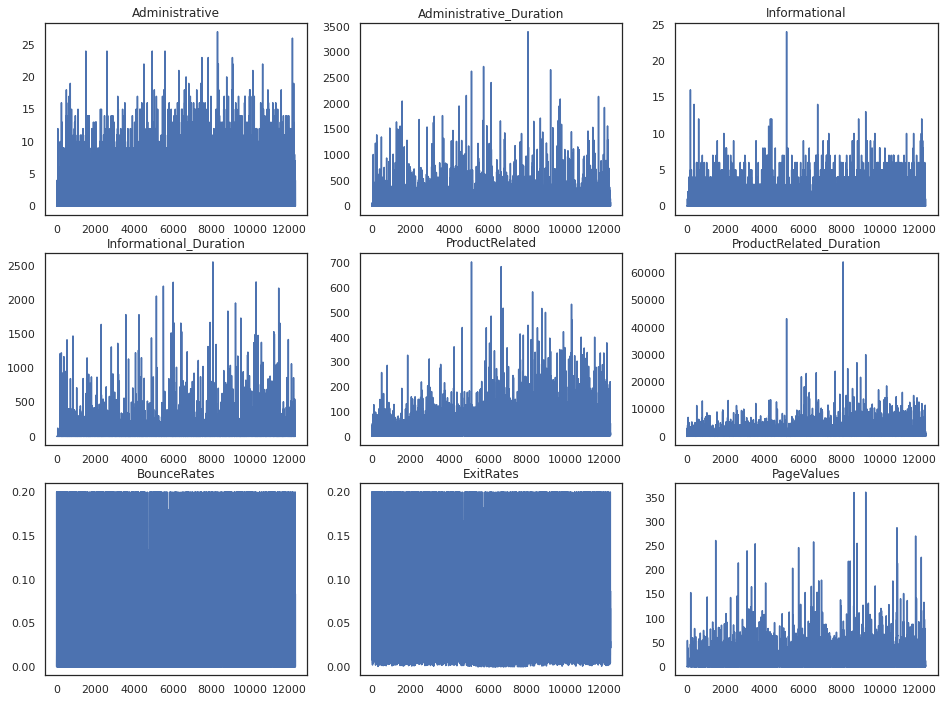

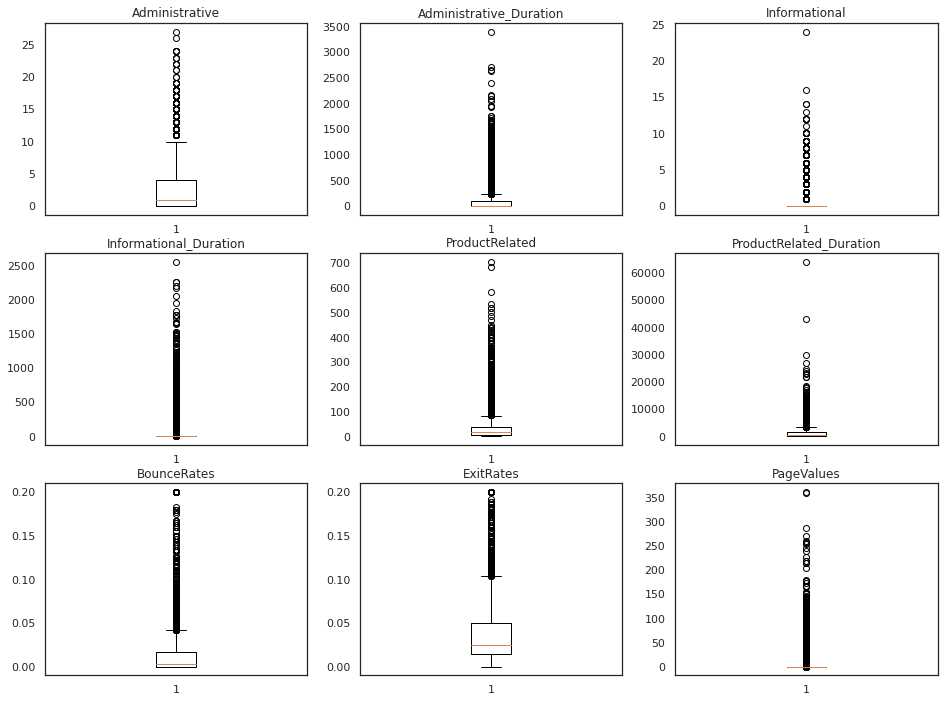

In [10]:
ll = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
figure(figsize=(16, 12))
plt.title('hist')
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.title(ll[i-1])
    plt.hist(df[ll[i-1]])
plt.show()
print()
figure(figsize=(16, 12))
plt.title('plot')
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.title(ll[i-1])
    plt.plot(range(df.shape[0]), df[ll[i-1]])
plt.show()
print()
figure(figsize=(16, 12))
plt.title('boxplot')
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.title(ll[i-1])
    plt.boxplot(df[ll[i-1]])
plt.show()

#### 觀察類別型態的資料與 Revenue 的分布關係

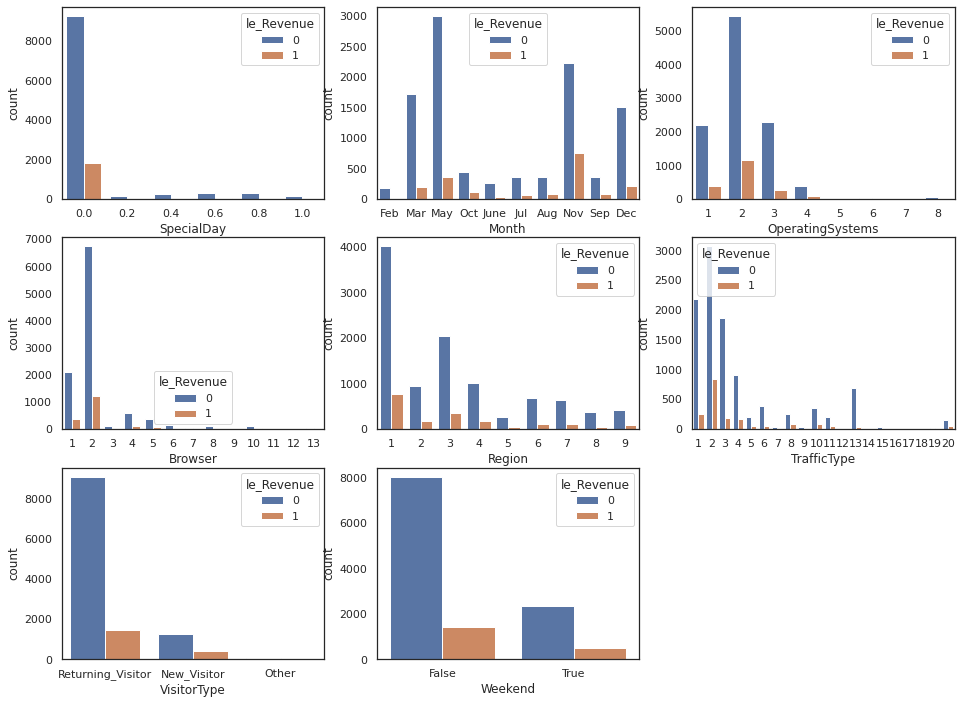

In [11]:
ll = ['SpecialDay', 'Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
figure(figsize=(16, 12))
for i in range(1, len(ll)+1):
    plt.subplot(3,3,i)
    # plt.title(ll[i-1])
    sns.countplot(df[ll[i-1]], hue=df['le_Revenue'])
plt.show()

#### 將數值資料做 scale，避免差距影響過大

In [0]:
ll = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
for d in ll:
    df[f'pre_{d}'] = preprocessing.scale(df[d])

In [13]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,le_Month,le_Revenue,le_Weekend,le_VisitorType,pre_Administrative,pre_Administrative_Duration,pre_Informational,pre_Informational_Duration,pre_ProductRelated,pre_ProductRelated_Duration,pre_BounceRates,pre_ExitRates,pre_PageValues
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,2,0,0,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2,0,0,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,2,0,0,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2,0,0,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,2,0,1,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178


- 定義評分 function，方便我看到模型的結果好壞

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc

def performance(ans_y, predictions):
    print('accuracy_score: ', accuracy_score(ans_y, predictions))
    print('recall_score:   ', recall_score(ans_y, predictions))
    print('precision_score:', precision_score(ans_y, predictions))
    print('f1_score:       ', f1_score(ans_y, predictions))
    tn, fp, fn, tp = confusion_matrix(ans_y, predictions).ravel()
    print('tn, fp, fn, tp: ', tn, fp, fn, tp)
    fpr, tpr, thresholds = roc_curve(ans_y, predictions, pos_label=1)
    print('auc: ', auc(fpr, tpr))

## 模型訓練與調整
- 因為是 imbalance data，我想要以 f1_score 為評斷標準，並參考 auc 的結果

### original
- 將所有資料直接餵進去

In [15]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1012)
capture_ll = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration',
              'BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','le_Month','le_Weekend','le_VisitorType']
print(df_train.shape, df_test.shape)
	
train_x = df_train[capture_ll]
train_y = df_train['le_Revenue']
test_x = df_test[capture_ll]
test_y = df_test['le_Revenue']
print(train_x.shape, train_y.shape)

(9864, 31) (2466, 31)
(9864, 17) (9864,)


#### DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1012, max_depth=10)
model.fit(train_x, train_y)

pred = model.predict(train_x)
valid_acc = accuracy_score(train_y, pred)
performance(train_y, pred)

accuracy_score:  0.9490064882400648
recall_score:    0.7550753110674525
precision_score: 0.8993759750390016
f1_score:        0.820932716269135
tn, fp, fn, tp:  8208 129 374 1153
auc:  0.8698010596359212


- 看 testset 上的結果

In [17]:
pred2 = model.predict(test_x)
valid_acc = accuracy_score(test_y, pred2)
performance(test_y, pred2)

accuracy_score:  0.8811841038118411
recall_score:    0.5511811023622047
precision_score: 0.6325301204819277
f1_score:        0.5890603085553997
tn, fp, fn, tp:  1963 122 171 210
auc:  0.7463339564568817


#### LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1022, solver="lbfgs", max_iter=30)

model.fit(train_x, train_y)
pred = model.predict(train_x)

clear_output()
performance(train_y, pred)

accuracy_score:  0.8819951338199513
recall_score:    0.5507531106745253
precision_score: 0.6376042456406369
f1_score:        0.5910049191848208
tn, fp, fn, tp:  7859 478 686 841
auc:  0.7467091689872567


- 看 testset 上的結果

In [19]:
pred2 = model.predict(test_x)
valid_acc = accuracy_score(test_y, pred2)
performance(test_y, pred2)

accuracy_score:  0.8896999188969992
recall_score:    0.5669291338582677
precision_score: 0.6687306501547987
f1_score:        0.6136363636363635
tn, fp, fn, tp:  1978 107 165 216
auc:  0.7578050945070715


#### result
- 得到了一個 baseline 的分數 
- DecisionTreeClassifier
    - f1_score: 0.5890603085553997
    - auc:  0.7463339564568817
- LogisticRegression
    - f1_score: 0.6136363636363635
    - auc:  0.7578050945070715

### improve 1
- 我認為數值資料的差距過大會影響權重與結果
- 所以這邊拿做前處理過的數值資料

In [20]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1012)
capture_ll = ['pre_Administrative','pre_Administrative_Duration','pre_Informational','pre_Informational_Duration','pre_ProductRelated','pre_ProductRelated_Duration',
              'pre_BounceRates','pre_ExitRates','pre_PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','le_Month','le_Weekend','le_VisitorType']
print(df_train.shape, df_test.shape)
	
train_x = df_train[capture_ll]
train_y = df_train['le_Revenue']
test_x = df_test[capture_ll]
test_y = df_test['le_Revenue']
print(train_x.shape, train_y.shape)

(9864, 31) (2466, 31)
(9864, 17) (9864,)


#### DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1012, max_depth=10)
model.fit(train_x, train_y)

pred = model.predict(train_x)
valid_acc = accuracy_score(train_y, pred)
performance(train_y, pred)

accuracy_score:  0.9490064882400648
recall_score:    0.7550753110674525
precision_score: 0.8993759750390016
f1_score:        0.820932716269135
tn, fp, fn, tp:  8208 129 374 1153
auc:  0.8698010596359212


- 看 testset 上的結果

In [22]:
pred2 = model.predict(test_x)
valid_acc = accuracy_score(test_y, pred2)
performance(test_y, pred2)

accuracy_score:  0.8807785888077859
recall_score:    0.5511811023622047
precision_score: 0.6306306306306306
f1_score:        0.5882352941176471
tn, fp, fn, tp:  1962 123 171 210
auc:  0.7460941483034045


#### LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1022, solver="lbfgs", max_iter=15)

model.fit(train_x, train_y)
pred = model.predict(train_x)

clear_output()
performance(train_y, pred)

accuracy_score:  0.8841240875912408
recall_score:    0.3857236411263916
precision_score: 0.7418136020151134
f1_score:        0.5075398535114175
tn, fp, fn, tp:  8132 205 938 589
auc:  0.6805672301829631


- 看 testset 上的結果

In [24]:
pred2 = model.predict(test_x)
valid_acc = accuracy_score(test_y, pred2)
performance(test_y, pred2)

accuracy_score:  0.8884833738848338
recall_score:    0.4120734908136483
precision_score: 0.7548076923076923
f1_score:        0.533106960950764
tn, fp, fn, tp:  2034 51 224 157
auc:  0.693806529579486


#### result
- DecisionTreeClassifier 沒什麼改變
    - f1_score: 0.5882352941176471
    - auc:  0.7460941483034045
- LogisticRegression 反而變差了
    - f1_score: 0.533106960950764
    - auc:  0.693806529579486

### improve 2
- 我覺得有些資料並不是那麼有用，所以拿進去 train 反而影響 score
- 所以這邊決定拿相關係數的絕對值比較高的資料

In [25]:
abs(train_corr['le_Revenue']) > 0.1

Administrative              True
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated              True
ProductRelated_Duration     True
BounceRates                 True
ExitRates                   True
PageValues                  True
SpecialDay                 False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
le_Month                   False
le_Revenue                  True
le_Weekend                 False
le_VisitorType              True
Name: le_Revenue, dtype: bool

In [26]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1012)
capture_ll = ['Administrative','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','le_VisitorType']
print(df_train.shape, df_test.shape)
	
train_x = df_train[capture_ll]
train_y = df_train['le_Revenue']
test_x = df_test[capture_ll]
test_y = df_test['le_Revenue']
print(train_x.shape, train_y.shape)

(9864, 31) (2466, 31)
(9864, 7) (9864,)


#### DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1012, max_depth=15, max_features='sqrt', criterion= 'entropy')
model.fit(train_x, train_y)

pred = model.predict(train_x)
valid_acc = accuracy_score(train_y, pred)
performance(train_y, pred)

accuracy_score:  0.954683698296837
recall_score:    0.8244924688932548
precision_score: 0.8755215577190543
f1_score:        0.8492411467116358
tn, fp, fn, tp:  8158 179 268 1259
auc:  0.9015109579682778


- 看 testset 上的結果

In [28]:
pred2 = model.predict(test_x)
valid_acc = accuracy_score(test_y, pred2)
performance(test_y, pred2)

accuracy_score:  0.8828061638280617
recall_score:    0.5853018372703412
precision_score: 0.6299435028248588
f1_score:        0.6068027210884355
tn, fp, fn, tp:  1954 131 158 223
auc:  0.761236050529655


#### LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1022, solver="lbfgs", max_iter=35)

model.fit(train_x, train_y)
pred = model.predict(train_x)

clear_output()
performance(train_y, pred)

accuracy_score:  0.8920316301703163
recall_score:    0.5795677799607073
precision_score: 0.676605504587156
f1_score:        0.6243386243386243
tn, fp, fn, tp:  7914 423 642 885
auc:  0.7644150522689467


- 看 testset 上的結果

In [30]:
pred2 = model.predict(test_x)
valid_acc = accuracy_score(test_y, pred2)
performance(test_y, pred2)

accuracy_score:  0.8961881589618816
recall_score:    0.5958005249343832
precision_score: 0.6899696048632219
f1_score:        0.6394366197183099
tn, fp, fn, tp:  1983 102 154 227
auc:  0.7734398308125153


#### result
- 發現在兩個 model 上的分數都變高了，可見過濾掉無相關 data 是有用的
- DecisionTreeClassifier
    - f1_score: 0.6068027210884355
    - auc:  0.761236050529655
- LogisticRegression
    - f1_score: 0.6394366197183099
    - auc:  0.7734398308125153

### improve 3
- 發現只用比較有相關的資料是對 model 有正向影響的
- 再來我想要換 ensemble 的 model 看看效果

In [31]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1012)
capture_ll = ['Administrative','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','le_VisitorType']
print(df_train.shape, df_test.shape)
	
train_x = df_train[capture_ll]
train_y = df_train['le_Revenue']
test_x = df_test[capture_ll]
test_y = df_test['le_Revenue']
print(train_x.shape, train_y.shape)

(9864, 31) (2466, 31)
(9864, 7) (9864,)


#### RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1012, n_estimators=150, max_depth=30, min_samples_leaf=7, criterion='entropy', oob_score=True)
model.fit(train_x, train_y)

pred = model.predict(train_x)
valid_acc = accuracy_score(train_y, pred)
performance(train_y, pred)

accuracy_score:  0.9345093268450932
recall_score:    0.6784544859201048
precision_score: 0.869857262804366
f1_score:        0.7623252391464311
tn, fp, fn, tp:  8182 155 491 1036
auc:  0.8299313331603644


- 看 testset 上的結果

In [33]:
pred2 = model.predict(test_x)
valid_acc = accuracy_score(test_y, pred2)
performance(test_y, pred2)

accuracy_score:  0.9047039740470397
recall_score:    0.5800524934383202
precision_score: 0.7466216216216216
f1_score:        0.6528803545051699
tn, fp, fn, tp:  2010 75 160 221
auc:  0.7720406352083687


#### AdaBoostClassifier

In [34]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1012, n_estimators=40)
model.fit(train_x, train_y)

pred = model.predict(train_x)
valid_acc = accuracy_score(train_y, pred)
performance(train_y, pred)

accuracy_score:  0.8944647201946472
recall_score:    0.587426326129666
precision_score: 0.6857798165137615
f1_score:        0.6328042328042329
tn, fp, fn, tp:  7926 411 630 897
auc:  0.7690640086927568


- 看 testset 上的結果

In [35]:
pred2 = model.predict(test_x)
valid_acc = accuracy_score(test_y, pred2)
performance(test_y, pred2)

accuracy_score:  0.8994322789943228
recall_score:    0.5984251968503937
precision_score: 0.7058823529411765
f1_score:        0.6477272727272728
tn, fp, fn, tp:  1990 95 153 228
auc:  0.7764308238448612


#### result
- 發現在兩個 ensemble model 上的分數都變高了
- 判斷 ensemble 還是比單純的 model 還強大，不論是多變的情況或是 overfitting 都更能夠處理
- RandomForestClassifier
    - f1_score: 0.6528803545051699
    - auc:  0.7720406352083687
- AdaBoostClassifier
    - f1_score: 0.6477272727272728
    - auc:  0.7764308238448612

## Report
### [Online Shoppers Purchasing Intention Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)
### classification problem: 預測 Revenue 是 True / False
- 因為是 imbalance data，所以用 f1 score 與 AUC 來評斷 model 的好壞


### 資料分析與處理
- 首先確認資料並沒有缺失
- 藉由畫圖可以看出 Revenue 滿不平均的，False 占了大部分
- 因為 Revenue 的不平均，以致我決定要用 f1 score 與 AUC 去當評量標準
- 再來可以畫出各種數值資料的分布情形，也畫出各種類別資料與 Revenue 的分布關係
- 我覺得不太容易直接從圖上找出太大的關聯性
- 所以我做了相關係數的 heatmap，也挑出與 Revenue 較具有關係的 data
    - 選出 Administrative、ProductRelated、ProductRelated_Duration、BounceRates、ExitRates、PageValues、VisitorType
- 再來就是套用不同的 dataset 與 model，並藉由調整參數查看與推斷結果

### Original
- 首先我先對 類別(string) 性質的資料做 labelencoder，才能夠拿來使用
- 然後把全部的資料餵進去給 model
- 就這樣得出了 baseline 的結果
- DecisionTreeClassifier
    - f1_score: 0.5890603085553997
    - auc:  0.7463339564568817
- LogisticRegression
    - f1_score: 0.6136363636363635
    - auc:  0.7578050945070715



### improve 1
- 再來我認為數值資料的範圍大小會影響到不同的結果，所以我將數值資料全部做 scale
- 然後一樣把所有的資料 (scale 過後)餵進去 model
- 結果分數比 original 還低，因此我認為將數值 scale 過後丟進去並不是好的做法
- DecisionTreeClassifier 
    - f1_score: 0.5882352941176471
    - auc:  0.7460941483034045
- LogisticRegression 
    - f1_score: 0.533106960950764
    - auc:  0.693806529579486

### improve 2
- 於是我認為應該從放進去的資料下手
- 藉由我上面畫出與印出的相關係數去找應該用的資料
- 於是我用 abs(correlation) > 0.1 的資料餵進去給 model
- 我認為這樣的資料是與答案 (Revenue) 比較具有相關性的
- 從結果可以看出不論是 f1 或是 auc 的效果都比一開始的 baseline 好
- DecisionTreeClassifier
    - f1_score: 0.6068027210884355
    - auc:  0.761236050529655
- LogisticRegression
    - f1_score: 0.6394366197183099
    - auc:  0.7734398308125153

### improve 3
- 再來我覺得使用較具有相關性的資料下去訓練是可行的，於是我想要換個 model 試試看
- 我選擇使用 ensemble 的 model
- 因為 ensemble 的 model 可以有效應付更多樣化的 data 以及更好的避免 overfitting
- 從結果上來看，ensemble model 的效果的確是最好的
- RandomForestClassifier
    - f1_score: 0.6528803545051699
    - auc:  0.7720406352083687
- AdaBoostClassifier
    - f1_score: 0.6477272727272728
    - auc:  0.7764308238448612

### model 參數調整
- DecisionTreeClassifier
    - max_depth 控制深度避免overfitting
    - max_features 控制 feature 數避免overfitting
    - criterion 嘗試 gini 跟 entropy 的差別
- LogisticRegression
    - solver 選用 lbfgs
    - max_iter 控制跌代數
- RandomForestClassifier
    - n_estimators 增加 estimators 增加可能性
    - max_depth 控制深度避免overfitting
    - min_samples_leaf 改變最小的 leaf 劃分，讓 feature 畫在一起
    - criterion 改為使用 entropy
    - oob_score 讓 model 自行驗證
- AdaBoostClassifier
    - n_estimators 改變 estimators 增加可能性

### Summary
- 由於是 imbalance data，我所有 model 的 false negtive 都比 false postive 多，一開始 model 沒調整好便會全部都猜 false
- 其中影響最大的 feature 是 Page Value，因為他與 Revenue 的相關性最高
    - 查到的解釋是 Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).
    - 此頁面的價值與他是否能產生收入有相當大的關聯
- 話說使用者果然很多都是看一看沒有買 (我自己好像也是XD)，Revenue 的 True 只有 15% 真的有夠少